In [1]:
import numpy as np
import pandas as pd
import os

os.chdir('Data sets')

### Clustering

En este ejercicio tomaremos los datos proporcionados en https://www.kaggle.com/c/titanic/data de los sobrevivientes del Titatnic para realizar un análisis por medio de un dendrograma. Primeramente cargaremos los datos pra identificar las variables y ver de que tipo son, así como ver sus medidas descriptivas para ver su comportamiento.
    
    Descripción de variables:
    
    PassengerId:       Id del registro en esta base de datos.
    Survived:          0 si no sobrevivió y 1 si lo hizo. 
    Pclass             Clase en la que viajaba. (1, 2 o 3).
    Name               Nombre del pasajero.
    Sex                Sexo del pasajero.
    Age                Edad del pasajero.
    SibSp              Número de hermanos(as)/esposos(as) a bordo.
    Parch              Número de padres/hijos a bordo.
    Ticket             Número de ticket.
    Fare               Pasaje,
    Cabin              Cabina.
    Embarked           Puerto de embarcamiento

In [26]:
df = pd.read_csv("train.csv")
print(df.describe(),'\n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.00000

Primeramente podemos notar que la variable edad tiene un problema de datos faltantes ya que al contrario de las demas variables que cuentan con 891 registros "Age" solo tiene 714 lo que significa que le faltan 177 datos que representan casi el 20 por ciento de valores. Como primer prueba vamos a completar estos registros con la media de la variable. Además eliminaremos las columnas que no proporcionan datos numéricos y la que solo indica el id del registro (PassengerID).

In [27]:
df.drop(df.columns[[0,3,4,8,10,11]], axis=1)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7.2500
1,1,1,38,1,0,71.2833
2,1,3,26,0,0,7.9250
3,1,1,35,1,0,53.1000
4,0,3,35,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54,0,0,51.8625
7,0,3,2,3,1,21.0750
8,1,3,27,0,2,11.1333
9,1,2,14,1,0,30.0708


In [28]:
df.fillna(df.median())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [29]:
df = df.drop(df.columns[[0,3,4,8,10,11]], axis=1)
df = df.fillna(df.median())
print(df.describe(),'\n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 48.7 KB
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000  

En este momento ya tenemos los datos listos para comenzar el agrupamiento y comenzamos con 891 *clusters* cada uno con 1 solo registro en su conjunto. A continuación utilizaremos la función mostrada en clase por el profesor para crear la matriz de distancias.

In [31]:
from scipy.spatial import distance
np.set_printoptions(precision=1, suppress=True) # Cortar la impresión de decimales a 1

md = distance.squareform(distance.pdist(df, 'euclidean')) # Convertir el vector de distancias a una matriz cuadrada
print(md)

[[  0.   66.    4.3 ...,  17.4  23.2  10.1]
 [ 66.    0.   64.5 ...,  49.   43.   63.9]
 [  4.3  64.5   0.  ...,  15.8  22.2   6.1]
 ..., 
 [ 17.4  49.   15.8 ...,   0.    7.5  16.4]
 [ 23.2  43.   22.2 ...,   7.5   0.   23.2]
 [ 10.1  63.9   6.1 ...,  16.4  23.2   0. ]]


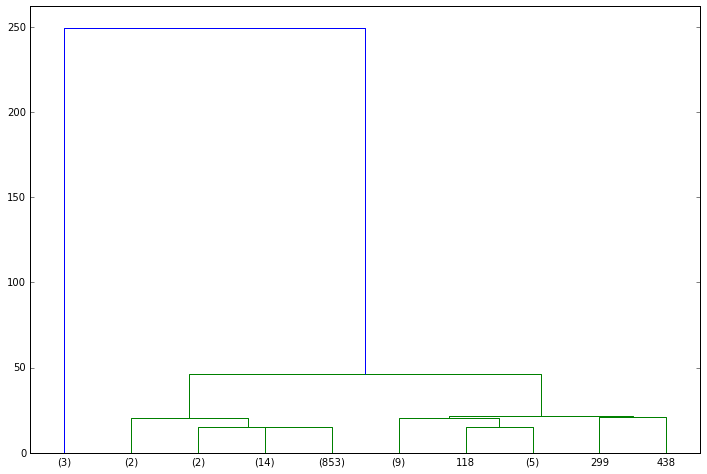

In [45]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z = linkage(df, 'single')
plt.figure(figsize=(12, 8))
dendrogram(Z,truncate_mode='lastp', p=10,show_leaf_counts=True,leaf_font_size=14)
plt.show()

Aplicando el método *single* y mostrando los últimos diez grupos del dendograma resultante podemos notar que la mayoría de estos, a excepción de tres de un solo valor, son grupos de al menos dos valores. Podemos identificar dos grupos en lo más alto de la gráfica divididos por la línea ázul donde uno de los grupos cuenta con un solo *subgrupo* de tres elementos y el otro con al menos dos subgrupos señalados por las líneas verdes. Volveremos a imprimir este método mostrando los últimos 50 grupos para verificar que el comportamiento es más o menos como se describió de manera geneneral, más sin embargo, también notar que entre más grande sea el desglose, o se observe más la parte baja de la gráfica obtendremos una idea más clara del comportamiento de los datos.

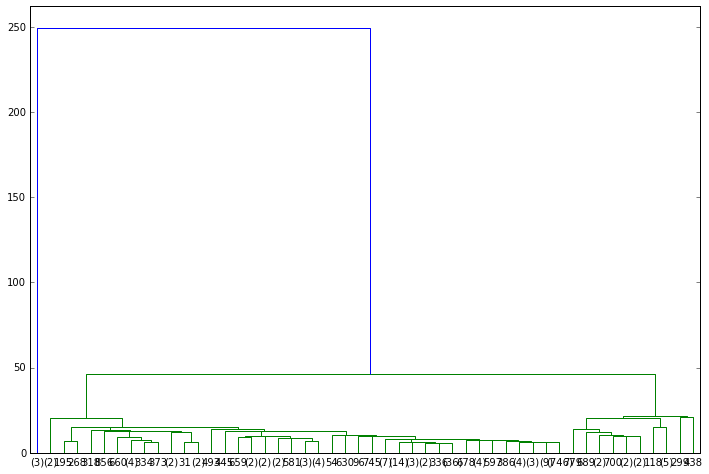

In [46]:
plt.figure(figsize=(12, 8))
dendrogram(Z,truncate_mode='lastp', p=50,show_leaf_counts=True,leaf_font_size=14)
plt.show()

A continuación se hará el agrupamiento con los métodos de *complete* y de *centroid* para hacer las comparaciones con *single* descrito arriba. Para poder ver las similitudes y diferencias entre estos tres métodos graficaremos el dendograma de cada uno de ellos que muestra los últimos diez grupos en un primer renglon e inmediatamente debajo de estos el mismo gráfico pero mostrando los últimos 50 grupos.

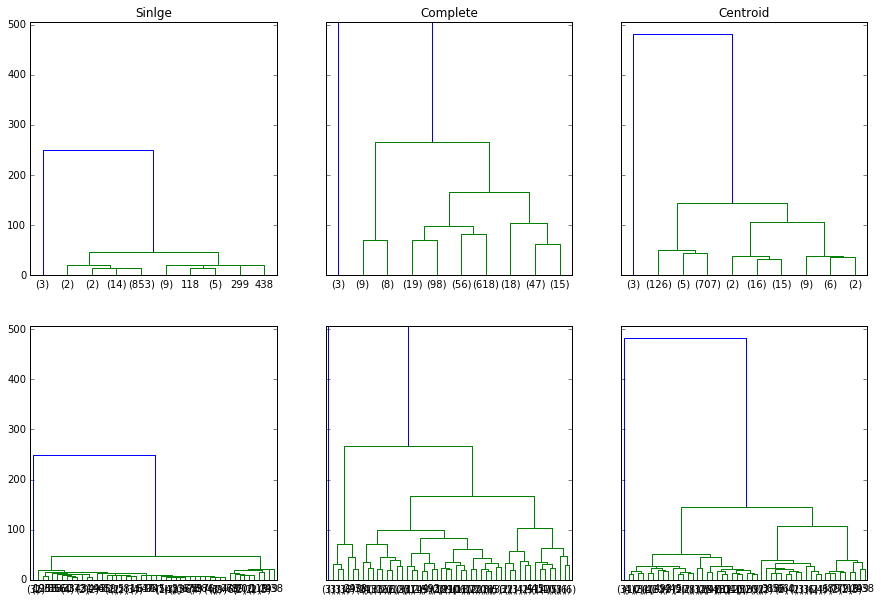

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=True, figsize=(15,10))
Z = linkage(df, 'single')
dendrogram(Z,ax=axes[0,0],truncate_mode='lastp', p=10,show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,ax=axes[1,0],truncate_mode='lastp', p=50,show_leaf_counts=True,leaf_font_size=14)
Z = linkage(df, 'complete')
dendrogram(Z,ax=axes[0,1],truncate_mode='lastp', p=10,show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,ax=axes[1,1],truncate_mode='lastp', p=50,show_leaf_counts=True,leaf_font_size=14)
Z = linkage(df, 'centroid')
dendrogram(Z,ax=axes[0,2],truncate_mode='lastp', p=10,show_leaf_counts=True,leaf_font_size=14)
dendrogram(Z,ax=axes[1,2],truncate_mode='lastp', p=50,show_leaf_counts=True,leaf_font_size=14)
axes[0,0].set_title('Sinlge')
axes[0,1].set_title('Complete')
axes[0,2].set_title('Centroid')
plt.show()

Como primera particularidad de *single* contra los otros dos métodos podemos constar que las distancias son más pequeñas entre sus últimos grupos, mientras que el grupo que aparece en solitario en las tres gráficas tiene una distancia de más de 500 en el caso de *complete* y un poco menos de 500 en *centroid*, en el primer método la distancia más grande es de 250 aproximadamente lo que representa más o menos la mitad de la distancia mayor en los otros dos. Esto se debe a la manera en la que fueron construidas las agrupaciones en este método comenzando a agrupar los valores más cercanos entre si, mientras en el método completo se inicia viendo las distancias más grandes y en centroide donde se calculan las distancias de un punto al centroide de cierto grupo para hacer la agrupación.

Volviendo a la manera en la que están agrupados los datos y para tratar de hacer un mejor análisis etiquetaremos los últimos diez grupos de la siguiente manera labels = (a, b, c, d, e, f, g, h, i, j). Haciendo esto, los grupos se dividen de la siguiente manera: 
    
  Método        | Agrupamiento
  ------------- | -------------
  single        | {a, {b, {c, d, e}}, {f, {g, h}, i, j}
  complete      | {a, {b, c}, {{d, e}, {f, g}, h, {i, j}}} 
  centroid      | {a, {b, {c, d}}, {{e, {f, g}}, {h, {i, j}}}}
  
Como ya habíamos observado anteriormente el cluster *'a'* aparece separado del resto en los tres diagramas. Sin embargo el resto de los grupos si se ordenan de diferente manera, si identificamos tres grupos principales el segundo grupo de *single* cuenta con {b, {c, d, e}}, *complete* consta del conjunto {b, c} y *centroid* con {b, {c, d}}. La diferencia principal es que ninguno de los tres coincide en el número de elementos en este grupo con cuatro, dos y tres respectivamente. 